**A ideia é automatizar os cálculos utilizando pandas e sumpy e assim calcular as derivadas parciais e as incertezas de forma automatizada para o relatório de dilatação.**

**Testando aumotizar os cálculos direto do excel**

In [ ]:

import sympy as sp
import pandas as pd

dados = pd.read_excel('dados.xlsx')

# Defina as variáveis simbólicas
x, y, z = sp.symbols('x y z')

# Defina a expressão
expr = x**2 + y**2 + z**2


# Obtenha os valores do array para substituição
coluna1 = dados['x'].values
print(coluna1)
y_valor = dados['y'].values
print(y_valor)

# Substitua os valores diretamente na expressão
expr_substituida = expr.subs({x: coluna1[0], y: y_valor[0], z: 4})
print("fazendo direto pelo excel",expr_substituida)

[1 2 3 4 5]
[5 6 7 8 9]
fazendo direto pelo excel 42


**O 1º passo é utilizar os dados já do excel para importar e já deixar os cálculos prontos. Para isso irei utilizar o formato dict(zip)**

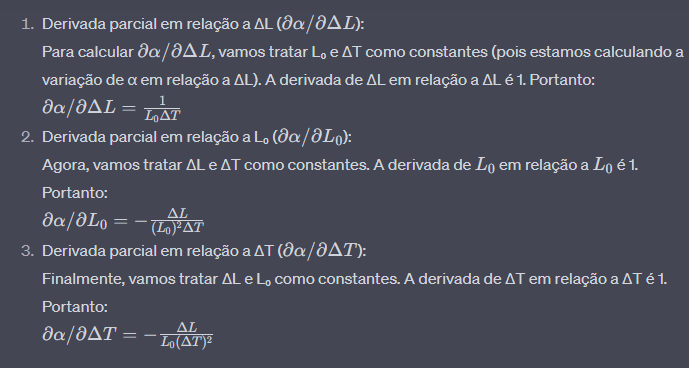​


In [ ]:
import pandas as pd
import sympy as sp

# Carregue o arquivo Excel
dados2 = pd.read_excel('dados2.xlsx')

# Transforme os dados em um dicionário
dados_dict = dict(zip(dados2['variavel'], dados2['valor']))

# Exiba o dicionário
print("dicionarios dos dados em excel", dados_dict)

# Defina as variáveis simbólicas
deltaL, Lo, deltaT, alpha = sp.symbols('deltaL Lo deltaT alpha')

FileNotFoundError: ignored

**Já tendo os dados em excel em formato dicionário, agora irei calcular o coeficiente linear e depois a primeira derivada parcial para DeltaT e as demais**


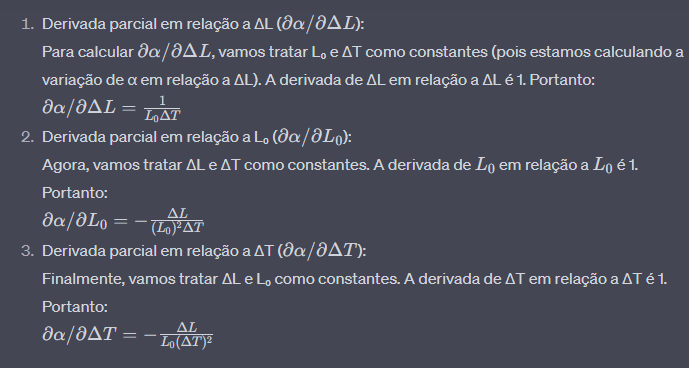

In [ ]:
# Defina a expressão para alpha
alpha_expr = deltaL / (Lo * deltaT)
alpha = alpha_expr.subs(dados_dict)
print("coef_linear",alpha)

# Calcule a primeira derivada parcial de alpha em relação a DeltaL
derivada_deltaL = sp.diff(alpha_expr, deltaL)
print("derivada parcial para deltaL:", derivada_deltaL)

# Avalie a derivada no ponto específico
valor_da_derivada_deltaL = derivada_deltaL.subs(dados_dict)

# Exiba o resultado
print("calculando a derivada com os dados em excel",valor_da_derivada_deltaL)

coef_linear 0.000527272727272727
derivada parcial para deltaL: 1/(Lo*deltaT)
calculando a derivada com os dados em excel 0.00181818181818182


**Agora irei calcular a Derivada parcial para Lo**

In [ ]:
# Defina a expressão para alpha
alpha_expr = deltaL / (Lo * deltaT)

# Calcule a primeira derivada parcial de alpha em relação a DeltaL
derivada_Lo = sp.diff(alpha_expr, Lo)
print("derivada parcial para deltaL:", derivada_Lo)

# Avalie a derivada no ponto específico
valor_da_derivada_Lo = derivada_Lo.subs(dados_dict)

# Exiba o resultado
print("calculando a derivada com os dados em excel",valor_da_derivada_Lo)

derivada parcial para deltaL: -deltaL/(Lo**2*deltaT)
calculando a derivada com os dados em excel -2.39669421487603e-5


**Derivada parcial para DeltaT**

In [ ]:
# Defina a expressão para alpha
alpha_expr = deltaL / (Lo * deltaT)

# Calcule a primeira derivada parcial de alpha em relação a DeltaL
derivada_deltaT = sp.diff(alpha_expr, deltaT)
print("derivada parcial para deltaL:", derivada_deltaT)

# Avalie a derivada no ponto específico
valor_da_derivada_deltaT = derivada_deltaT.subs(dados_dict)

# Exiba o resultado
print("calculando a derivada com os dados em excel",valor_da_derivada_deltaT)

derivada parcial para deltaL: -deltaL/(Lo*deltaT**2)
calculando a derivada com os dados em excel -2.10909090909091e-5


**Já tendo os valores da derivada parciais, agora tenho que utilizar a formula da propagação de erros com as incertezas de L, Lo e T.
Aproveitando também para calcular a incerteza da temperatura e o erro percentual.**

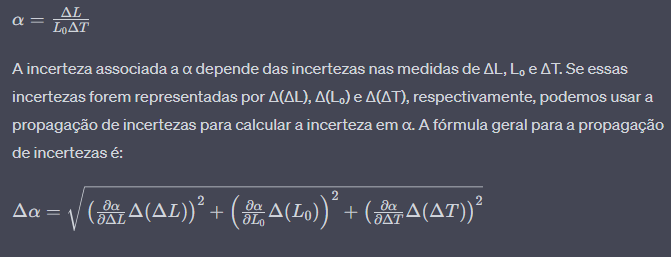

In [ ]:
import numpy as np

# Acesse diretamente os valores das incertezas do dicionário
incerteza_deltaL = dados_dict['incertezadeltaL']
incerteza_deltaLo = dados_dict['incertezadeltaLo']
incerteza_deltaT = dados_dict['incertezadeltaT']
incerteza_To = dados_dict["incerteza_To"]
incerteza_Tf = dados_dict["incerteza_Tf"]
alpha_teorico = dados_dict["alpha_teorico"]


# Crie uma função lambda para calcular a incerteza de alpha
calcular_incerteza_alpha = lambda a, b, c, e, f, g: ((a * e)**2 + (b * f)**2 + (c * g)**2)**0.5
print("incerteza_alpha:",calcular_incerteza_alpha(valor_da_derivada_deltaL,valor_da_derivada_Lo, valor_da_derivada_deltaT,incerteza_deltaL,incerteza_deltaLo,incerteza_deltaT))

incerteza_temperatura = lambda a, b,: ((a**2 + b**2))**0.5
print("incerteza temperatura", incerteza_temperatura(incerteza_To,incerteza_Tf))

erro_percentual = lambda a,b: (abs(a - b/b)*100)
print("erro percentual:", erro_percentual(alpha, alpha_teorico))

incerteza_alpha: 2.57320974149892e-6
incerteza temperatura 0.223606797749979
erro percentual: 99.9472727272727


In [ ]:
import docx
from docx import Document

# Instancia o documento
document = Document()

# Adiciona o titulo do documento com document Title
document.add_heading('Relatorio Dilatação', 0)

# Criando o paragráfo e estilizando
p = document.add_paragraph('A plain paragraph having some ')
p.add_run('bold').bold = True
p.add_run(' and some ')
p.add_run('italic.').italic = True

# instanciando o titulo e paragrafos
document.add_heading('Heading, level 1', level=1)
document.add_paragraph('Intense quote', style='Intense Quote')
document.add_paragraph(
    'first item in unordered list', style='List Bullet'
)
document.add_paragraph(
    'first item in ordered list', style='List Number'
)

# adicionando uma figura
# document.add_picture('monty-truth.png', width=Inches(1.25))

# Calculando os valores das incertezas e erro percentual
incerteza_alpha = calcular_incerteza_alpha(valor_da_derivada_deltaL, valor_da_derivada_Lo, valor_da_derivada_deltaT, incerteza_deltaL, incerteza_deltaLo, incerteza_deltaT)
incerteza_temp = incerteza_temperatura(incerteza_To, incerteza_Tf)
erro_perc = erro_percentual(alpha, alpha_teorico)

# criando uma tupla com informações
records = (
    (incerteza_alpha, 'Incerteza_alpha'),
    (incerteza_temp, 'Incerteza_temperatura'),
    (erro_perc, 'erro_percentual')
)

# criando uma tabela instanciando o documento com 1 linha e 3 colunas
table = document.add_table(rows=1, cols=2)
# criando celulas a partir da 1º posição da linha
row = table.rows[0].cells
# criando as 3 colunas
row[0].text = 'Incerteza_alpha'
row[1].text = 'Incerteza_temperatura'

# para cada coluna, será preenchido os valores de records
for qty, id in records:
    # preenche para cada linha
    row_cells = table.add_row().cells
    # com qty está em numero e preciso transforma em string
    row_cells[0].text = str(qty)
    row_cells[1].text = id

# quebra de pagina
document.add_page_break()
# salvando
document.save('relatorio_dilatacao.docx')
